In [54]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from textblob import TextBlob
from plotly import graph_objs as go
from wordcloud import WordCloud

In [55]:
df=pd.read_csv("/Users/rutvajoshi/Documents/Masters final project/topic_distribution_fiat-e_.csv")
df.head()

0         1         2         3         4         5         6  \
0  0.285873  0.017579  0.326306  0.266307  0.031866  0.014539  0.009805   
1  0.298322  0.056686  0.240712  0.065295  0.198382  0.010725  0.007233   
2  0.036011  0.012968  0.022119  0.152733  0.242101  0.010725  0.007233   
3  0.443617  0.027279  0.046530  0.137355  0.141417  0.022562  0.015215   
4  0.119835  0.043153  0.073608  0.362773  0.078228  0.035691  0.024070   

          7         8         9  \
0  0.009074  0.023760  0.014890   
1  0.006694  0.104965  0.010984   
2  0.006694  0.498432  0.010984   
3  0.014082  0.036871  0.115072   
4  0.022276  0.058328  0.182038   

                                            Comments  
0  How to make this review short. Fiat have a Win...  
1  Nice review, I am having a test drive on Tuesd...  
2  I saw Jonny Smith’s early review of this and t...  
3  I work in the NHS and with their finance packa...  
4  I noticed this site seems to have some really ...

In [56]:
# Function to calculate sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


In [57]:
# Apply sentiment analysis to the 'Comments' column
df['sentiment_polarity'] = df['Comments'].apply(get_sentiment_polarity)


In [58]:
# Define a function to label sentiments
def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [59]:
# Apply the sentiment labeling function
df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)

# Display the updated dataset
df.head(10)

0         1         2         3         4         5         6  \
0  0.285873  0.017579  0.326306  0.266307  0.031866  0.014539  0.009805   
1  0.298322  0.056686  0.240712  0.065295  0.198382  0.010725  0.007233   
2  0.036011  0.012968  0.022119  0.152733  0.242101  0.010725  0.007233   
3  0.443617  0.027279  0.046530  0.137355  0.141417  0.022562  0.015215   
4  0.119835  0.043153  0.073608  0.362773  0.078228  0.035691  0.024070   
5  0.265320  0.043153  0.073608  0.217288  0.078228  0.035691  0.024070   
6  0.226089  0.235968  0.010568  0.302746  0.178339  0.026013  0.003456   
7  0.351651  0.027279  0.230463  0.045389  0.141417  0.114528  0.015215   
8  0.059371  0.021380  0.036468  0.035574  0.543315  0.017683  0.156084   
9  0.639448  0.046518  0.018151  0.125335  0.126920  0.008801  0.005936   

          7         8         9  \
0  0.009074  0.023760  0.014890   
1  0.006694  0.104965  0.010984   
2  0.006694  0.498432  0.010984   
3  0.014082  0.036871  0.115072   
4  0.022276  0.058328  0.182038   
5  0.167762  0.058328  0.036553   
6  0.003198  0.008375  0.005248   
7  0.014082  0.036871  0.023106   
8  0.011037  0.028898  0.090189   
9  0.005493  0.014383  0.009014   

                                            Comments  sentiment_polarity  \
0  How to make this review short. Fiat have a Win...            0.142900   
1  Nice review, I am having a test drive on Tuesd...            0.237500   
2  I saw Jonny Smith’s early review of this and t...            0.450000   
3  I work in the NHS and with their finance packa...            0.278788   
4  I noticed this site seems to have some really ...            0.700000   
5  We’ve also got our test drive on Tuesday. Car ...            0.243750   
6  Forgot to mention the excellent turning circle...            0.170702   
7  You can definitely one pedal drive in range mo...           -0.077778   
8  Did you find the start up chimes/sound and low...           -0.200000   
9  Not noticeable. We could just about hear the o...            0.000000   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  
5        Positive  
6        Positive  
7        Negative  
8        Negative  
9         Neutral

In [60]:
# Combine all comments into a single string
all_comments = ' '.join(df['Comments'])


In [61]:
# Combine all comments for each sentiment into a single string
positive_comments = ' '.join(df[df['sentiment_label'] == 'Positive']['Comments'])
negative_comments = ' '.join(df[df['sentiment_label'] == 'Negative']['Comments'])
neutral_comments = ' '.join(df[df['sentiment_label'] == 'Neutral']['Comments'])


In [62]:
# Create WordCloud objects for each sentiment
positive_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(positive_comments)
negative_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(negative_comments)
neutral_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(neutral_comments)


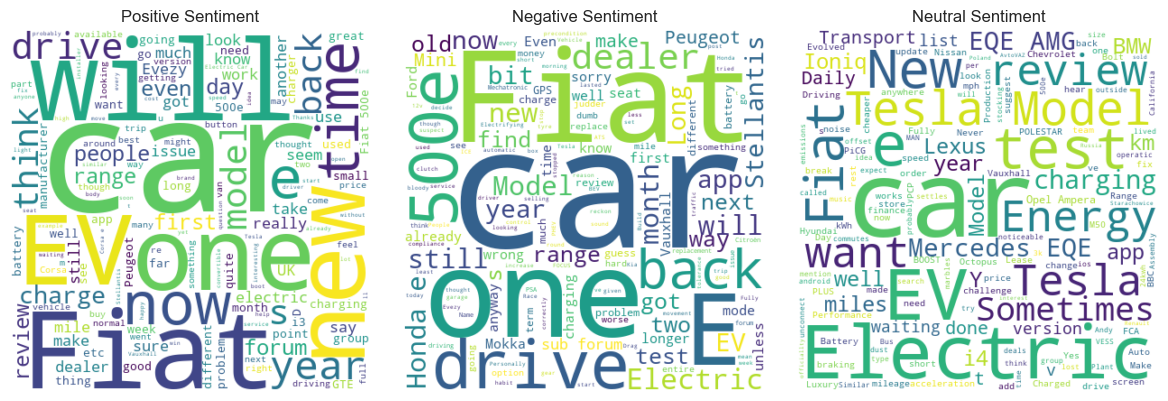

In [63]:
# Plot the WordCloud images with different colors for each sentiment
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis("off")

plt.subplot(132)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis("off")

plt.subplot(133)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis("off")

plt.tight_layout()
plt.show()

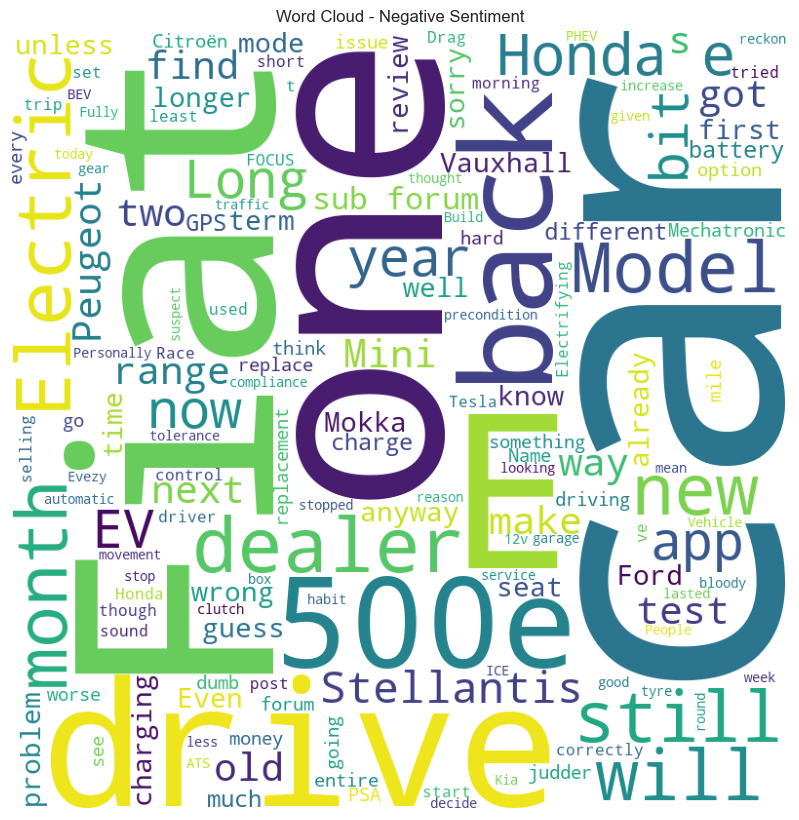

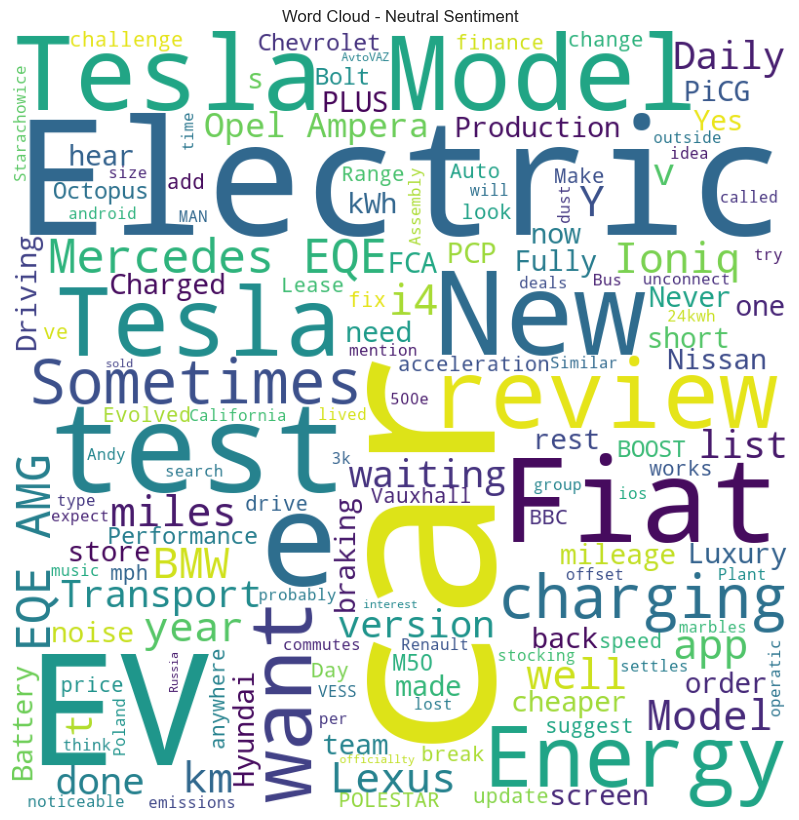

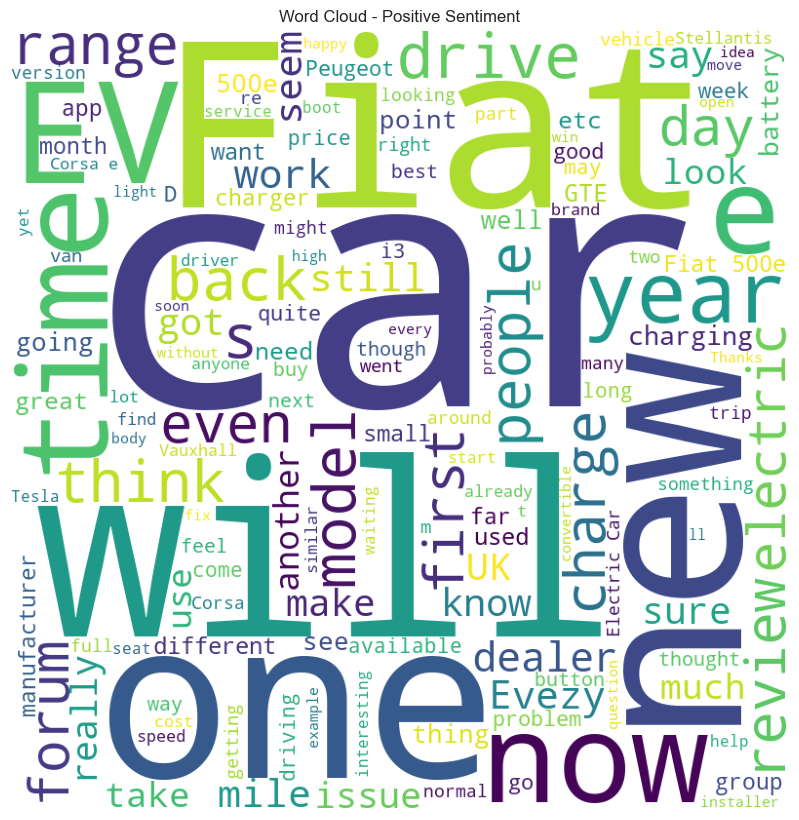

In [64]:
# Iterate through each sentiment label and create a word cloud
for sentiment_label, color in zip(sentiment_labels, sentiment_colors):
    # Combine all comments for the current sentiment into a single string
    sentiment_comments = ' '.join(df[df['sentiment_label'] == sentiment_label]['Comments'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(sentiment_comments)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud - {sentiment_label} Sentiment')
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

In [13]:
# Column index to drop
column_to_drop = "Comments"

In [14]:
# Drop the specified column
df= df.drop(columns=[column_to_drop])
df.head()

0         1         2         3         4         5         6  \
0  0.285873  0.017579  0.326306  0.266307  0.031866  0.014539  0.009805   
1  0.298322  0.056686  0.240712  0.065295  0.198382  0.010725  0.007233   
2  0.036011  0.012968  0.022119  0.152733  0.242101  0.010725  0.007233   
3  0.443617  0.027279  0.046530  0.137355  0.141417  0.022562  0.015215   
4  0.119835  0.043153  0.073608  0.362773  0.078228  0.035691  0.024070   

          7         8         9  sentiment_polarity sentiment_label  
0  0.009074  0.023760  0.014890            0.142900        Positive  
1  0.006694  0.104965  0.010984            0.237500        Positive  
2  0.006694  0.498432  0.010984            0.450000        Positive  
3  0.014082  0.036871  0.115072            0.278788        Positive  
4  0.022276  0.058328  0.182038            0.700000        Positive

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   379 non-null    float64
 1   1                   379 non-null    float64
 2   2                   379 non-null    float64
 3   3                   379 non-null    float64
 4   4                   379 non-null    float64
 5   5                   379 non-null    float64
 6   6                   379 non-null    float64
 7   7                   379 non-null    float64
 8   8                   379 non-null    float64
 9   9                   379 non-null    float64
 10  sentiment_polarity  379 non-null    float64
 11  sentiment_label     379 non-null    object 
dtypes: float64(11), object(1)
memory usage: 35.7+ KB


In [16]:
#Missing values computation
df.isnull().sum()

0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
sentiment_polarity    0
sentiment_label       0
dtype: int64

In [18]:
X= df.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

In [19]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,9):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

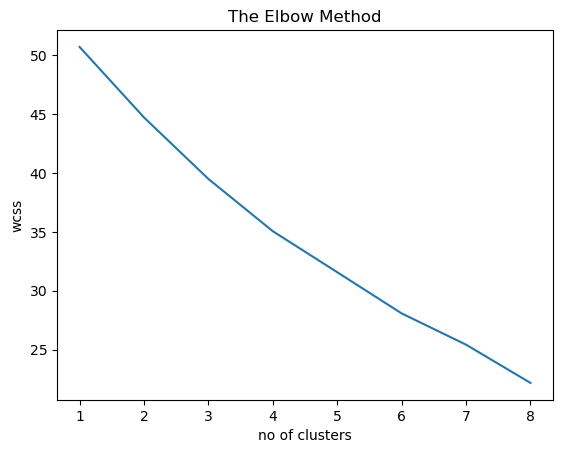

In [21]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,9), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Add cluster labels to the DataFrame
df['cluster_label'] = y_kmeans


/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Extract the columns containing topic probabilities (0 to 14)
topic_probs = df.iloc[:, :10]

In [24]:
# Assign topics based on maximum probability column index
assigned_topics = topic_probs.idxmax(axis=1)


In [25]:
# Add the assigned topics to the DataFrame
df['assigned_topic'] = assigned_topics
df.head()

0         1         2         3         4         5         6  \
0  0.285873  0.017579  0.326306  0.266307  0.031866  0.014539  0.009805   
1  0.298322  0.056686  0.240712  0.065295  0.198382  0.010725  0.007233   
2  0.036011  0.012968  0.022119  0.152733  0.242101  0.010725  0.007233   
3  0.443617  0.027279  0.046530  0.137355  0.141417  0.022562  0.015215   
4  0.119835  0.043153  0.073608  0.362773  0.078228  0.035691  0.024070   

          7         8         9  sentiment_polarity sentiment_label  \
0  0.009074  0.023760  0.014890            0.142900        Positive   
1  0.006694  0.104965  0.010984            0.237500        Positive   
2  0.006694  0.498432  0.010984            0.450000        Positive   
3  0.014082  0.036871  0.115072            0.278788        Positive   
4  0.022276  0.058328  0.182038            0.700000        Positive   

   cluster_label assigned_topic  
0              0              2  
1              2              0  
2              3              8  
3              2              0  
4              3              3

In [26]:
# Step 1: Interpret Cluster Labels
cluster_summary = df.groupby('assigned_topic').mean()
print(cluster_summary)

                       0         1         2         3         4         5  \
assigned_topic                                                               
0               0.372342  0.059020  0.116996  0.092757  0.113700  0.048804   
1               0.119867  0.405031  0.091832  0.103146  0.096733  0.052462   
2               0.122302  0.063869  0.385781  0.104252  0.076531  0.030609   
3               0.147721  0.074091  0.086620  0.345964  0.117483  0.052555   
4               0.133816  0.059954  0.077682  0.100552  0.426180  0.049165   
5               0.111769  0.064582  0.065987  0.085183  0.094686  0.442806   
6               0.153522  0.027480  0.052999  0.109819  0.117718  0.034792   
7               0.142088  0.049600  0.094658  0.064135  0.088373  0.031321   
8               0.141934  0.053603  0.082012  0.078596  0.087516  0.034749   
9               0.105789  0.031733  0.094481  0.044662  0.075357  0.060066   

                       6         7         8         9  sentime

In [27]:
# Step 2: Topic Analysis
cluster_topic_distribution = df.groupby('assigned_topic').size()
print(cluster_topic_distribution)


assigned_topic
0    123
1     17
2     57
3     35
4     44
5     19
6     15
7     22
8     31
9     16
dtype: int64


In [28]:
# Count the occurrences of each topic
topic_counts = df['assigned_topic'].value_counts()


In [29]:
# Convert topic numbers to integers and sort the topic counts
topic_counts.index = topic_counts.index.astype(int)
sorted_topic_counts = topic_counts.sort_index()


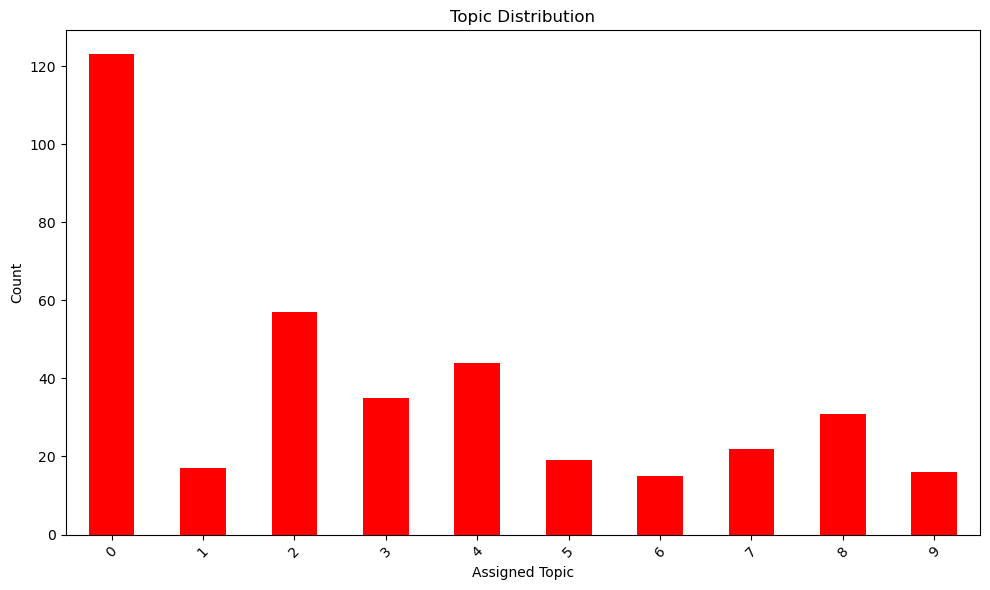

In [30]:
# Plot the sorted topic distribution
plt.figure(figsize=(10, 6))
sorted_topic_counts.plot(kind='bar', color='r')
plt.xlabel('Assigned Topic')
plt.ylabel('Count')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
themes =["charging availability",
              "EV's car comparison",
              "Electric Vehicle Model Showcase",
              "Costs and Pricing EVs",
              "EV User Experience & Challenges",
              "Dealer Interaction",
              "Tesla and Other EV Models",
              "Comparing EV Efficiency and Range",
              "EV Market Trends & Insights",
              "Exploring EV Market Trends and Costs"]

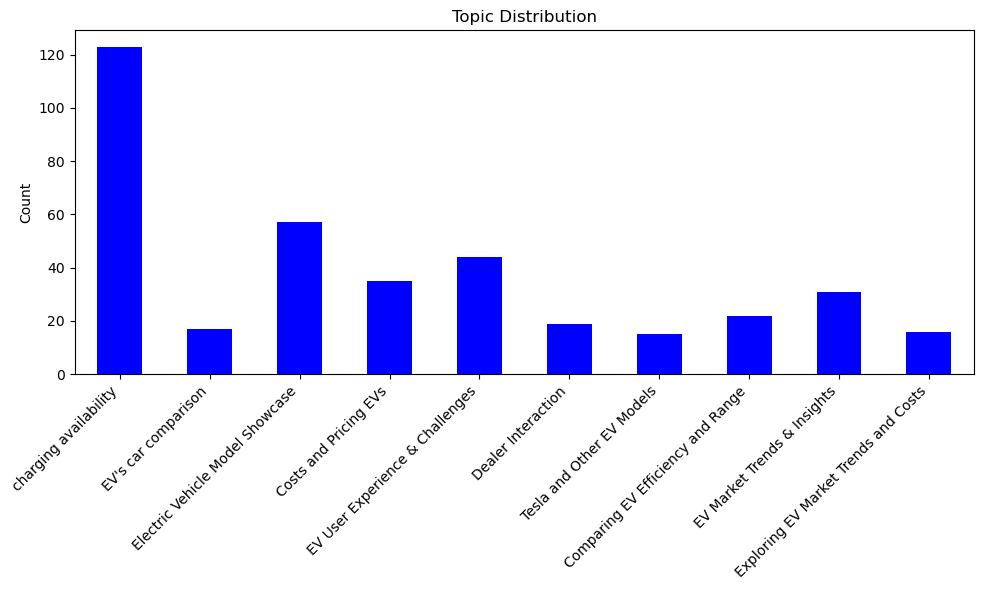

In [32]:
# Plot the sorted topic distribution
plt.figure(figsize=(10, 6))
sorted_topic_counts.plot(kind='bar', color='b')
plt.ylabel('Count')
plt.title('Topic Distribution')

# Customize x-axis labels
plt.xticks(range(len(themes)), themes, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [33]:
# Analyze sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()


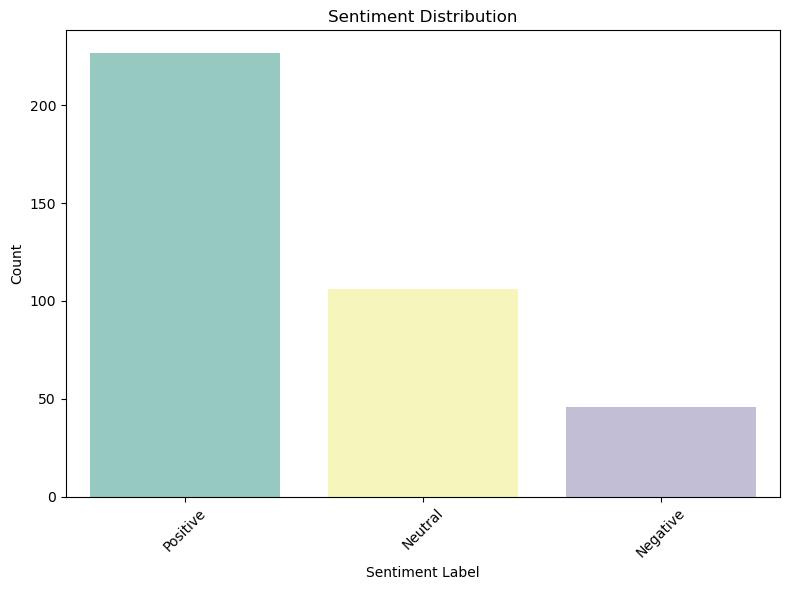

In [34]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set3")
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnelarea(
    text=sentiment_counts.index,
    values=sentiment_counts,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"},
    textinfo="label+value"  # Display both label name and value
))

fig.show()

In [36]:
# Count the occurrences of each sentiment label and sort them by index
sentiment_counts = df['sentiment_label'].value_counts().sort_index()


In [77]:
# Define sentiment labels and colors
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['purple', 'orange', 'brown']


In [78]:
# Create the Pie chart using Plotly
fig = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    textinfo='percent+value+label',
    marker_colors=sentiment_colors,
    textposition='auto',
    hole=0.3
)])

# Update the layout of the chart
fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(title='Sources'),
    yaxis=dict(title='Number of Posts in Twitter')
)

# Update the style of chart elements
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)

# Display the chart
fig.show()

In [39]:
# Explore sentiment across topics
sentiment_by_topic = df.groupby(['assigned_topic', 'sentiment_label']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

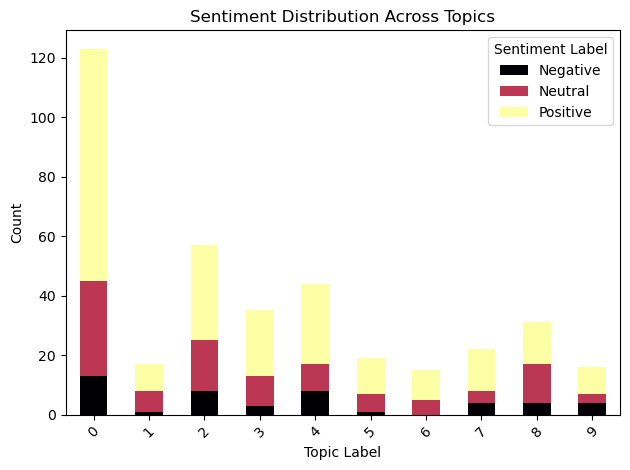

In [40]:
# Visualize sentiment across topics
plt.figure(figsize=(12, 8))
sentiment_by_topic.plot(kind='bar', stacked=True, colormap='inferno')
plt.xlabel('Topic Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Topics')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

In [41]:
# Explore sentiment across clusters
sentiment_by_cluster = df.groupby(['cluster_label', 'sentiment_label']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

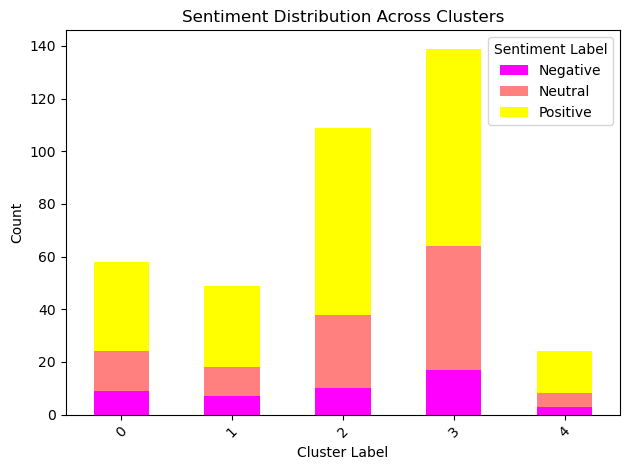

In [42]:
# Visualize sentiment across clusters
plt.figure(figsize=(12, 8))
sentiment_by_cluster.plot(kind='bar', stacked=True, colormap='spring')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Clusters')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

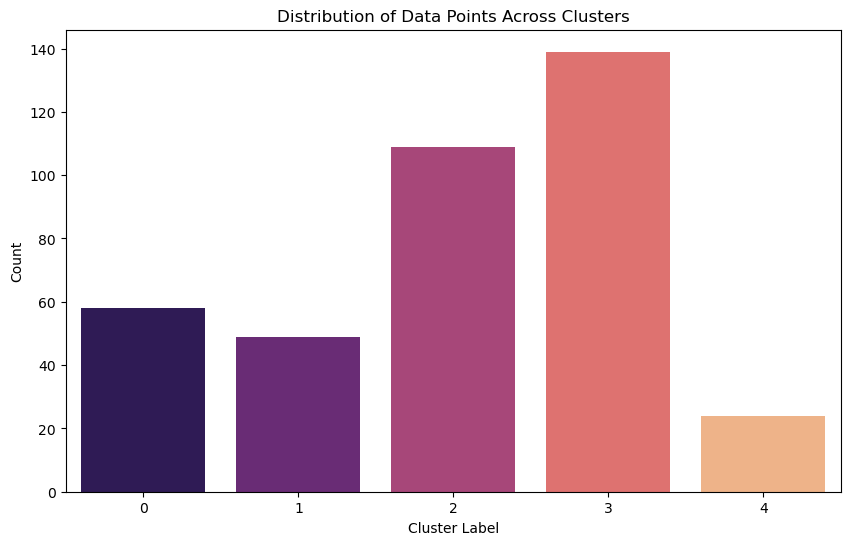

In [43]:
# Plot the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_label', data=df, palette='magma')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

In [44]:
# Explore cluster characteristics
cluster_characteristics = df.groupby('cluster_label').mean()


In [45]:
# Print cluster characteristics
print(cluster_characteristics)

                      0         1         2         3         4         5  \
cluster_label                                                               
0              0.122342  0.055161  0.390579  0.103799  0.081896  0.025333   
1              0.124363  0.060919  0.056079  0.109261  0.416349  0.064981   
2              0.393654  0.055636  0.115645  0.087862  0.111419  0.043611   
3              0.142018  0.102103  0.089477  0.151420  0.093140  0.101255   
4              0.152988  0.061479  0.088834  0.061139  0.085053  0.034306   

                      6         7         8         9  sentiment_polarity  
cluster_label                                                              
0              0.055784  0.025855  0.086316  0.052934            0.131589  
1              0.057388  0.017540  0.055898  0.037223            0.120953  
2              0.036350  0.030675  0.079091  0.046057            0.160578  
3              0.045065  0.027226  0.153966  0.094329            0.094959  
4   

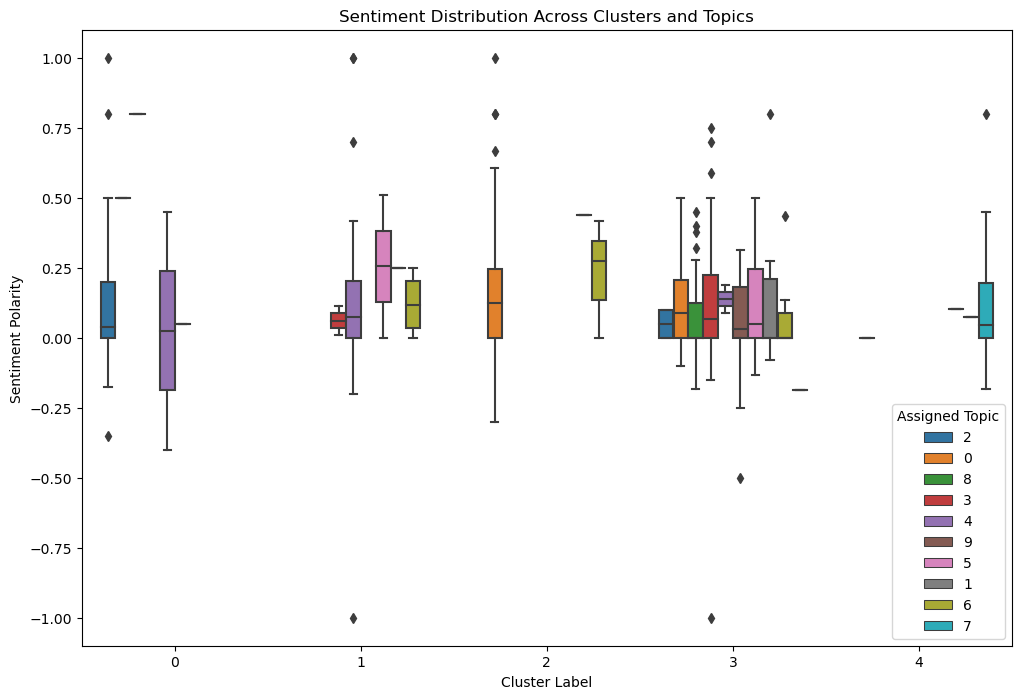

In [46]:
# Explore sentiment distribution across clusters and topics
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster_label', y='sentiment_polarity', hue='assigned_topic', data=df)
plt.xlabel('Cluster Label')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Distribution Across Clusters and Topics')
plt.legend(title='Assigned Topic')
plt.show()

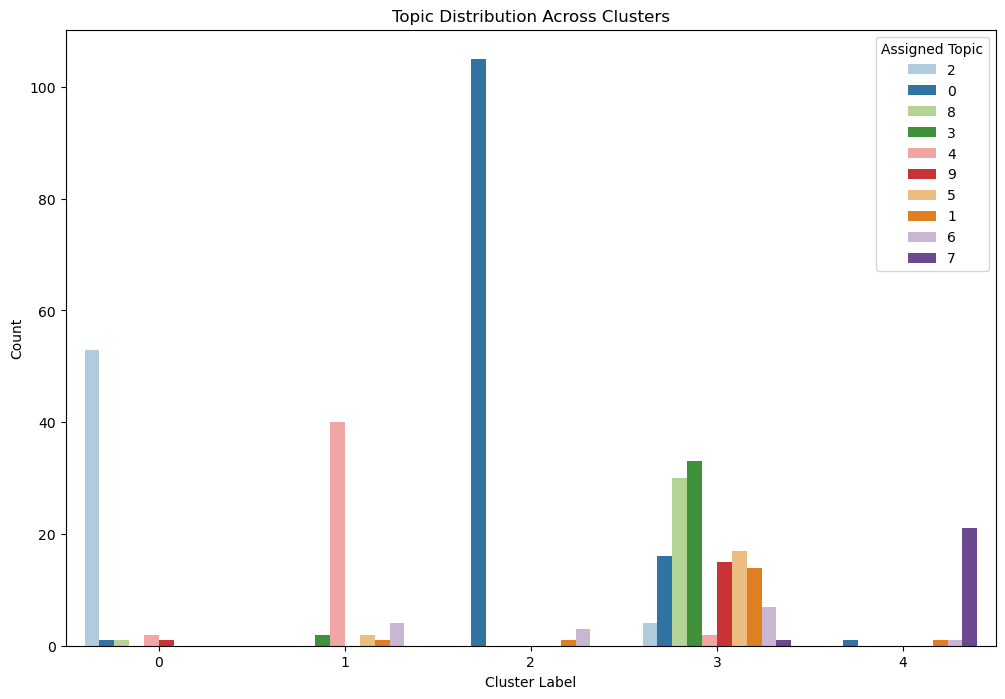

In [47]:
# Explore topic distribution across clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster_label', hue='assigned_topic', data=df, palette='Paired')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Topic Distribution Across Clusters')
plt.legend(title='Assigned Topic')
plt.show()

In [48]:
# Calculate average sentiment polarity for each cluster and topic
cluster_sentiment_avg = df.groupby('cluster_label')['sentiment_polarity'].mean()
topic_sentiment_avg = df.groupby('assigned_topic')['sentiment_polarity'].mean()


In [49]:
# Identify clusters with positive sentiment and associated topics
positive_clusters = cluster_sentiment_avg[cluster_sentiment_avg > 0].index
positive_topics = df[df['cluster_label'].isin(positive_clusters)]['assigned_topic'].unique()


In [50]:
# Print insights
print("Clusters with Positive Sentiment:", positive_clusters)
print("Associated Positive Topics:", positive_topics)

Clusters with Positive Sentiment: Int64Index([0, 1, 2, 3, 4], dtype='int64', name='cluster_label')
Associated Positive Topics: ['2' '0' '8' '3' '4' '9' '5' '1' '6' '7']


<Figure size 1500x600 with 0 Axes>

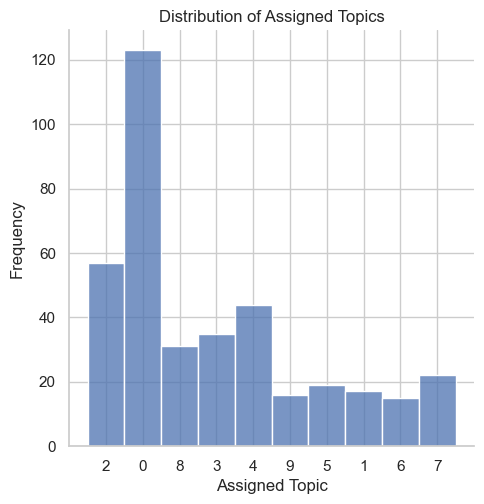

In [51]:
plt.figure(figsize=(15, 6))
sns.set(style='whitegrid')
sns.displot(data=df, x='assigned_topic', bins=len(df['assigned_topic'].unique()), kde=False)
plt.title('Distribution of Assigned Topics')
plt.xlabel('Assigned Topic')
plt.ylabel('Frequency')
plt.show()